## Images as arrays

When you scan a subject with MRI scanner, the images are first stored as **DICOM (Digital Imaging and Communications in Medicine)**.

As you see in the description here (https://en.wikibooks.org/wiki/Neuroimaging_Data_Processing/DICOM), most neuroimaging software tools convert them to a lighter, eaier-to-work-with format, **NIFTI**. So the first step in any neuroimaging processing is to convert DICOM to NIFTI format, using toos such as **dcm2nii**.

But reagardless of the file format, what you have to understand first is that images are simply **numerical arrays** that represent strength of a signal (i.e. intensity level) at a given point in space.

To demonstrate this, we will construct an array using **numpy** package and visualize it with **matplotlib** in python.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os.path as op

In [2]:
an_array = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
                     [ 0,  0,  0,  9, 99, 99, 94,  0],
                     [ 0,  0,  0, 25, 99, 99, 79,  0],
                     [ 0,  0,  0,  0,  0,  0,  0,  0],
                     [ 0,  0,  0, 56, 99, 99, 49,  0],
                     [ 0,  0,  0, 73, 99, 99, 31,  0],
                     [ 0,  0,  0, 91, 99, 99, 13,  0],
                     [ 0,  0,  9, 99, 99, 94,  0,  0],
                     [ 0,  0, 27, 99, 99, 77,  0,  0],
                     [ 0,  0, 45, 99, 99, 59,  0,  0],
                     [ 0,  0, 63, 99, 99, 42,  0,  0],
                     [ 0,  0, 80, 99, 99, 24,  0,  0],
                     [ 0,  1, 96, 99, 99,  6,  0,  0],
                     [ 0, 16, 99, 99, 88,  0,  0,  0],
                     [ 0,  0,  0,  0,  0,  0,  0,  0]])

We can check the size of the array.

In [3]:
an_array.shape

(15, 8)

We can show arrays as images using the plt.imshow command. This is the default output:

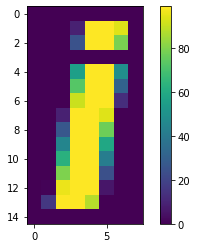

In [4]:
plt.imshow(an_array)
plt.colorbar()

We can change the colormap to gray, but the choice is arbitrary. You can choose any color map you like!

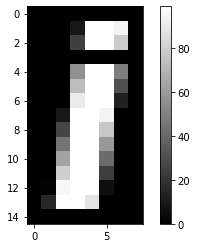

In [5]:
plt.imshow(an_array, cmap='gray')
plt.colorbar()

## NIFTI image

The above example is a small 2-dimensional array. Neuroimaging data are typically larger, and usually 3-D (anatomical image) or 4-D (3-D image with temporal axis).

The NIFTI image contains three basic components:
 
1. data array: this component is similar to an array above, except that it's 3-D or 4-D.
2. header: this component stores various meta-data about the image, like resolution, image size, etc.
3. affine: this component stores a transformation array that describes the relationship between data array and a reference space.

The concept of affine is described in detail here (https://nipy.org/nibabel/coordinate_systems.html), but basically it allows us to relate numbers in the data array (i, j, k) to a reference space, usually either a "real-world" scanner space or a standard template space (right-left, anterior-posterior, superior-inferior).

We can take a look at these components from the sample MRiShare data.

In [6]:
# my_data_dir = '/data/ro_formateur/mrishare'
my_data_dir = '/data/ishare'
sample_T1 = op.join(my_data_dir, 'SHARE0001', 'anat', 'SHARE0001_T1w.nii.gz')

We use nibabel package to load the sample T1 image.

In [7]:
import nibabel as nib

In [8]:
sample_T1_img = nib.load(sample_T1)
type(sample_T1_img)

nibabel.nifti1.Nifti1Image

You can check the size of the image data directly:

In [9]:
sample_T1_img.shape

(256, 256, 192)

You can explore other attributes of this nibabel image object using tab completion after "sample_T1_img".

In [10]:
sample_T1_img.

array([[ 7.11646397e-03,  1.75582077e-02,  9.99820471e-01,
        -1.01762154e+02],
       [-9.88993168e-01, -1.47647113e-01,  9.63228196e-03,
         1.55213852e+02],
       [-1.47789732e-01,  9.88884211e-01, -1.63142215e-02,
        -1.21344154e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Let's look at each component listed above.

First, we can access the data obj directly by img.dataobj or using method get_fdata().
The only difference between the two is how they occupy computational memory. You can read more about this here (https://nipy.org/nibabel/images_and_memory.html), and here (https://nipy.org/nibabel/nibabel_images.html#proxies-caching) but in most cases you can use one or the other to access data.

In [11]:
sample_dataobj = sample_T1_img.dataobj
type(sample_dataobj)

nibabel.arrayproxy.ArrayProxy

In [13]:
sample_dataobj.shape

(256, 256, 192)

In [16]:
# value at approximate midpoint of the data
sample_dataobj[128, 128, 91]

501

In [12]:
sample_data = sample_T1_img.get_fdata()
type(sample_data)

numpy.ndarray

In [14]:
sample_data.shape

(256, 256, 192)

In [17]:
sample_data[128, 128, 91]

501.0

Let's try to take the mid-slice and look at it using plt.imshow.

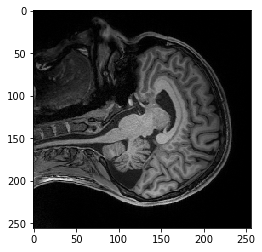

In [26]:
midslice_from_dataobj = sample_dataobj[:, :, 91]
plt.imshow(midslice_from_dataobj, cmap="gray")

Now let's look at the header.

In [18]:
sample_T1_img.header

In [19]:
print(sample_T1_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  3 256 256 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  2.0000000e+00  1.0000000e+00  1.0000000e+00  5.4989617e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 191
slice_code      : alternating increasing 2
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'TE=2.029999971;sec=54989.6175;phaseDir=+'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.5334907


You can access individual entry of the heade information like in a Dictionary.

In [20]:
sample_T1_img.header['dim']

array([  3, 256, 256, 192,   1,   1,   1,   1], dtype=int16)

Now let's look at the affine.

In [21]:
sample_T1_img.affine

array([[ 7.11646397e-03,  1.75582077e-02,  9.99820471e-01,
        -1.01762154e+02],
       [-9.88993168e-01, -1.47647113e-01,  9.63228196e-03,
         1.55213852e+02],
       [-1.47789732e-01,  9.88884211e-01, -1.63142215e-02,
        -1.21344154e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

Since nibabel is not the only program that can read Nifti images, you can access similar information/metadata about the image using other commandline tools that comes with other software packages, like **fslhd** and **fslinfo** from FSL, **mri_info** from Freesurfer package.

In [23]:
!fslinfo {sample_T1}

data_type      INT16
dim1           256
dim2           256
dim3           192
dim4           1
datatype       4
pixdim1        1.000000
pixdim2        1.000000
pixdim3        1.000000
pixdim4        2.000000
cal_max        0.0000
cal_min        0.0000
file_type      NIFTI-1+


In [ ]:
!fslhd {sample_T1}

In [24]:
!mri_info {sample_T1}

Volume information for /data/ishare/SHARE0001/anat/SHARE0001_T1w.nii.gz
          type: nii
    dimensions: 256 x 256 x 192
   voxel sizes: 1.000000, 1.000000, 1.000000
          type: FLOAT (3)
           fov: 256.000
           dof: 0
        xstart: -128.0, xend: 128.0
        ystart: -128.0, yend: 128.0
        zstart: -96.0, zend: 96.0
            TR: 2000.00 msec, TE: 0.00 msec, TI: 0.00 msec, flip angle: 0.00 degrees
       nframes: 1
       PhEncDir: UNKNOWN
       FieldStrength: 0.000000
ras xform present
    xform info: x_r =   0.0071, y_r =   0.0176, z_r =   0.9998, c_r =    -2.6210
              : x_a =  -0.9890, y_a =  -0.1476, z_a =   0.0096, c_a =    10.6486
              : x_s =  -0.1478, y_s =   0.9889, z_s =  -0.0163, c_s =   -15.2502
Orientation   : PSR
Primary Slice Direction: sagittal

voxel to ras transform:
                0.0071   0.0176   0.9998  -101.7622
               -0.9890  -0.1476   0.0096   155.2139
               -0.1478   0.9889  -0.0163  -121.3441
  

Likewise, many packages have specialized visualization tools to let you look at Nifti images. Try opening both T1 and FLAIR image in the data folder using the following viewers:

* FSLeyes: packaged with FSL
* freeview: packaged with Freesurfer
* MRIcron: standalone package


## Surface-based image formats

These are created when the volumetric image is processed to reconstruct a surface representation of the brain, as done by Freesurfer and other softwares. They are also essentially numerical arrays, but how this information is stored is different in different softwares. We will postpone examination of these formats until you learn about surface-based processing in the upcoming lectures.

But here is the good overview of various formats and how to read them in nibabel (https://nben.net/MRI-Geometry/#cortical-surfaces).
